# Feature Extraction (OpenSMILE)

To compare and choose the best performing feature set, we will utilize the feature sets built-in with OpenSMILE and run them on a couple of benchmark models to assess which feature set best fits our dataset.

On initial testing, the tested sets gave the following general insight for our 81 sample space.
- GeMAPSv01b ⇒ best performing set
- eGeMAPSv02 ⇒ high over-fitting risk
- ComParE_2016 ⇒ high-dimensionality risk for small sample space

first, let's install OpenSMILE:


In [1]:
!pip install opensmile

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.2/158.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 34.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.4/138.4 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 325.0/325.0 kB 19.4 MB/s eta 0:00:00


## Feature extraction function

Next, we'll create a function that uses openSMILE to extract relevant features from audio files. Basically it runs the opensmile command with the parameters we choose. It returns a pandas DataFrame object.


In [20]:
import opensmile
import pandas as pd

def extract_features(file_path):
    smile = opensmile.Smile(
        feature_set=opensmile.FeatureSet.GeMAPSv01b, #here we change the featureSet param as we try different sets
        feature_level=opensmile.FeatureLevel.Functionals,
    )
    features = smile.process_file(file_path)
    return features

## Extract features

we'll traverse over our dataset folder, running the `extract_features` function on each file in each sub-directory (healthy control=HC_AH, Parkinson's Disease=PD_AH). We'll manually add the label for classification through the location of the currently-processed file.

we append each file's features into a list of DataFrames `all_features`.


In [21]:
import os
import numpy as np

root_dir = '/content/drive/MyDrive/wav_Dataset' #defining root folder
target_subdirs = ['PD_AH', 'HC_AH']

all_features = [] # list to store features

for root, dirs, files in os.walk(root_dir):
    if os.path.basename(root) in target_subdirs:
        print(f"Processing files in target subdirectory: {root}")
        #sort files alphabetically
        files.sort()
        for file in files:
            if file.lower().endswith('.wav'):
                file_path = os.path.join(root, file)
                print(f"Attempting to extract features from: {file_path}")
                #try-except block for debugging
                try:
                    features = extract_features(file_path)

                    # add label (0=HC, 1=PD) for classification
                    if 'HC_AH' in file_path:
                        label = 0
                    elif 'PD_AH' in file_path:
                        label = 1

                    # add the label col
                    features['label'] = label
                    # add file name col
                    features['ID'] = file.split('.')[0]
                    all_features.append(features)
                    print(f"Successfully extracted features from: {file_path}")
                except Exception as e:
                    print(f"Failed to extract features from {file_path}: {e}")

Processing files in target subdirectory: /content/drive/MyDrive/wav_Dataset/HC_AH
Attempting to extract features from: /content/drive/MyDrive/wav_Dataset/HC_AH/AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav
Successfully extracted features from: /content/drive/MyDrive/wav_Dataset/HC_AH/AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5.wav
Attempting to extract features from: /content/drive/MyDrive/wav_Dataset/HC_AH/AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav
Successfully extracted features from: /content/drive/MyDrive/wav_Dataset/HC_AH/AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6.wav
Attempting to extract features from: /content/drive/MyDrive/wav_Dataset/HC_AH/AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav
Successfully extracted features from: /content/drive/MyDrive/wav_Dataset/HC_AH/AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2.wav
Attempting to extract features from: /content/drive/MyDrive/wav_Dataset/HC_AH/AH_123G_559F0706-2238-447C-BA39-DB5933BA619D.wav
Successfully extracted fea

## Saving to file:

We'll concatenate the list of DataFrames in `all_features` into a single DataFrame and then use the `to_csv` method to save it to a file.

In [22]:
# Concatenate all the DataFrames in the list
all_features_df = pd.concat(all_features)

excel_path="/content/drive/MyDrive/wav_Dataset/Demographics_age_sex.xlsx"
df_excel=pd.read_excel(excel_path)

merged_df = pd.merge(all_features_df, df_excel, on='ID', how='inner')
merged_df = merged_df.drop('Label', axis=1)

display(merged_df.head())

,F0semitoneFrom27.5Hz_sma3nz_amean,F0semitoneFrom27.5Hz_sma3nz_stddevNorm,F0semitoneFrom27.5Hz_sma3nz_percentile20.0,F0semitoneFrom27.5Hz_sma3nz_percentile50.0,F0semitoneFrom27.5Hz_sma3nz_percentile80.0,F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2,F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope,F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope,F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope,...,loudnessPeaksPerSec,VoicedSegmentsPerSec,MeanVoicedSegmentLengthSec,StddevVoicedSegmentLengthSec,MeanUnvoicedSegmentLength,StddevUnvoicedSegmentLength,label,ID,Age,Sex
0,27.182825,0.015623,26.907061,27.089689,27.347420,0.440359,3.036682,2.103869,2.821403,1.526633,...,3.494624,0.273224,3.63,0.0,0.00,0.0,0,AH_064F_7AB034C9-72E4-438B-A9B3-AD7FDA1596C5,69.0,M
1,24.147161,0.009580,23.962763,24.091129,24.267063,0.304300,4.981639,1.906378,3.413859,1.986530,...,3.555556,0.454545,2.13,0.0,0.05,0.0,0,AH_114S_A89F3548-0B61-4770-B800-2E26AB3908B6,43.0,M
2,37.131664,0.003260,37.056511,37.126587,37.182941,0.126431,2.014264,1.791731,2.395560,2.632963,...,4.912281,0.358423,2.75,0.0,0.02,0.0,0,AH_121A_BD5BA248-E807-4CB9-8B53-47E7FFE5F8E2,18.0,F
3,22.878942,0.008030,22.740513,22.835457,22.999954,0.259441,3.517267,3.137600,2.658834,2.679339,...,6.315790,0.357143,2.77,0.0,0.00,0.0,0,AH_123G_559F0706-2238-447C-BA39-DB5933BA619D,28.0,M
4,24.284147,0.008939,24.099270,24.285576,24.420343,0.321074,4.390659,1.613491,4.338348,2.159111,...,2.857143,0.241546,4.13,0.0,0.00,0.0,0,AH_195B_39DA6A45-F4CC-492A-80D4-FB79049ACC22,68.0,M


In [23]:
# Save the combined DataFrame to a CSV file
output_csv_path = '/content/drive/MyDrive/openSMILE_GeMAPSv01b.csv'
merged_df.to_csv(output_csv_path, index=False)

print(f"Extracted features saved to: {output_csv_path}")

Extracted features saved to: /content/drive/MyDrive/openSMILE_GeMAPSv01b.csv


We'll display the correlation heatmap for our features to see how they interact together:

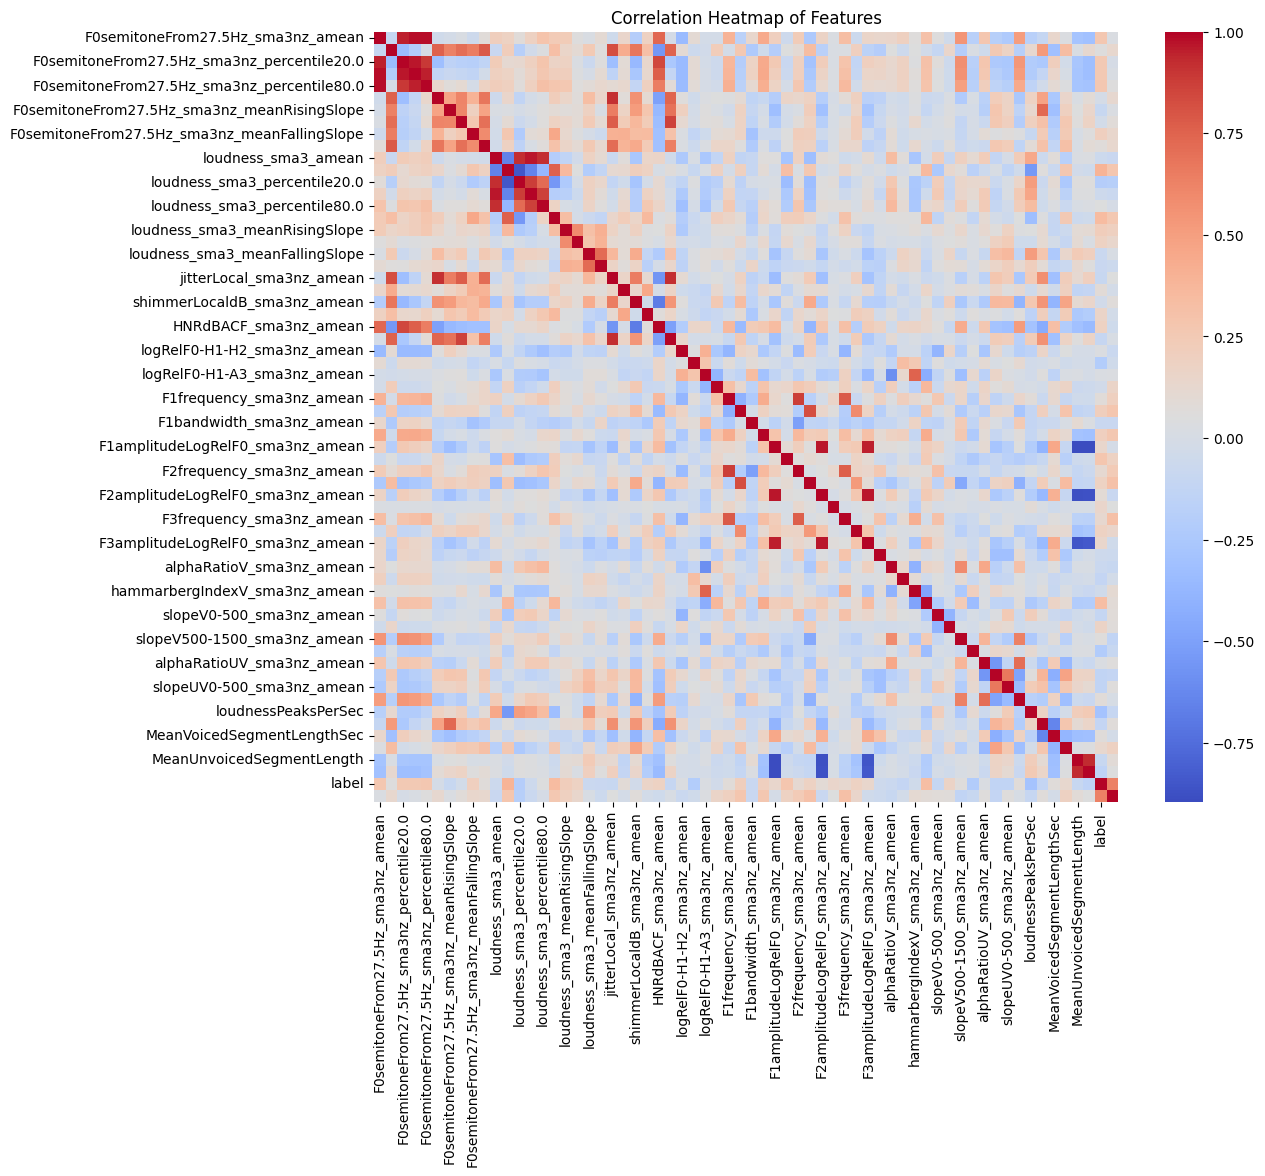

In [28]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

path = "/content/drive/MyDrive/openSMILE_GeMAPSv01b.csv"
features_df = pd.read_csv(path)

features_df = features_df.drop('ID', axis=1)
features_df = features_df.drop('Sex', axis=1)

# Calculate the correlation matrix
corr_matrix = features_df.corr()

# Display the correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap of Features')
plt.show()

In [4]:
import pandas as pd

path = "D:\\projects\\final_PD\\openSMILE_GeMAPSv01b.csv"

df=pd.read_csv(path)
print(df.describe())

       F0semitoneFrom27.5Hz_sma3nz_amean  \
count                          81.000000   
mean                           31.455559   
std                             4.932139   
min                            19.999773   
25%                            27.741316   
50%                            32.762960   
75%                            34.973465   
max                            41.109090   

       F0semitoneFrom27.5Hz_sma3nz_stddevNorm  \
count                               81.000000   
mean                                 0.036377   
std                                  0.060225   
min                                  0.001061   
25%                                  0.006894   
50%                                  0.009989   
75%                                  0.041768   
max                                  0.359517   

       F0semitoneFrom27.5Hz_sma3nz_percentile20.0  \
count                                   81.000000   
mean                                    30.832487   
st

In [5]:
df=df.drop(columns=['Sex', 'ID', 'Age'], axis=1)
std_ser=df.std()
std_ser=std_ser.sort_values(ascending=False)

In [6]:
print(std_ser)

F2frequency_sma3nz_amean                         176.968799
F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope      170.831835
F3frequency_sma3nz_amean                         161.561458
F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope    146.161152
F1frequency_sma3nz_amean                         139.265617
                                                    ...    
F3frequency_sma3nz_stddevNorm                      0.023431
slopeV0-500_sma3nz_amean                           0.019213
slopeUV500-1500_sma3nz_amean                       0.017551
jitterLocal_sma3nz_amean                           0.017529
slopeV500-1500_sma3nz_amean                        0.016130
Length: 63, dtype: float64


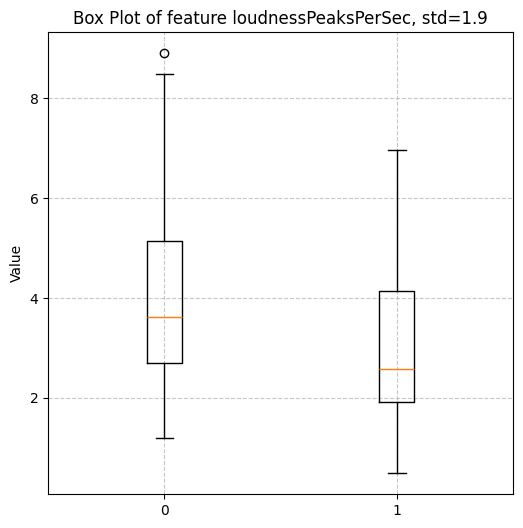

In [14]:
import matplotlib.pyplot as plt

grouped_kms = df.groupby('label')['loudnessPeaksPerSec'].apply(list)
plt.figure(figsize=(6,6))
plt.boxplot(grouped_kms.values, tick_labels=grouped_kms.index)
plt.title(f"Box Plot of feature loudnessPeaksPerSec, std={df["loudnessPeaksPerSec"].std():.1f}")
plt.ylabel('Value')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
